In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import pickle
import json

### Problem Statement

In [ ]:
from the information of costomer we predict how many tips he give :
    Age
    Gender
    Smoker
    Total amt in Rs
    Day 
    How many People 
    dinner / lunch
    
Calculate tip in Rs

### Data Gathering

In [5]:
import config
df = pd.read_csv(config.CSV_FILE_PATH)
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
46,22.23,5.00,Male,No,Sun,Dinner,2
66,16.45,2.47,Female,No,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
49,18.04,3.00,Male,No,Sun,Dinner,2
145,8.35,1.50,Female,No,Thur,Lunch,2


### Data Understanding

In [764]:
df.shape  # 244 | 7
df.isna().sum()  # 0
df.duplicated().sum() # 1
df.drop_duplicates(inplace=True)
df.shape
df.columns  # total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'
# df.info()
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


### EDA

<Axes: xlabel='tip', ylabel='Density'>

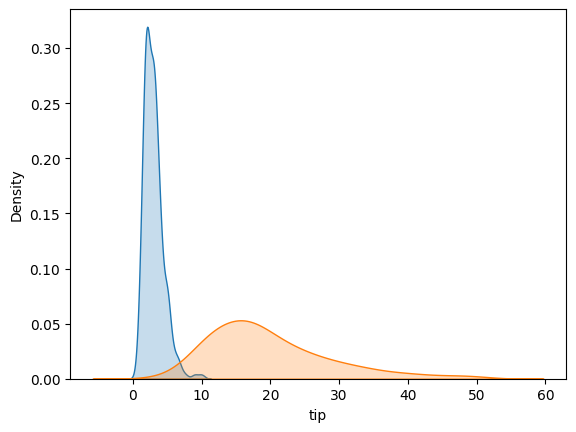

In [639]:
df["smoker"].value_counts()
sns.kdeplot(df["tip"],fill=True)
sns.kdeplot(df["total_bill"],fill=True)

In [640]:
df.sample(5)
df["smoker"].value_counts()  # Yes 92   No - 151
df["sex"].value_counts()     # Male- 157  Female - 86
df["day"].value_counts()     # sat,sun,thus,fri
df["size"].value_counts()    # 1 to 6
df["time"].value_counts()    # Dinner , Lunch

# sns.countplot(x = df["size"])

time
Dinner    176
Lunch      67
Name: count, dtype: int64

In [ ]:
total Bill >> 
tip        >> 

<Axes: xlabel='sex', ylabel='tip'>

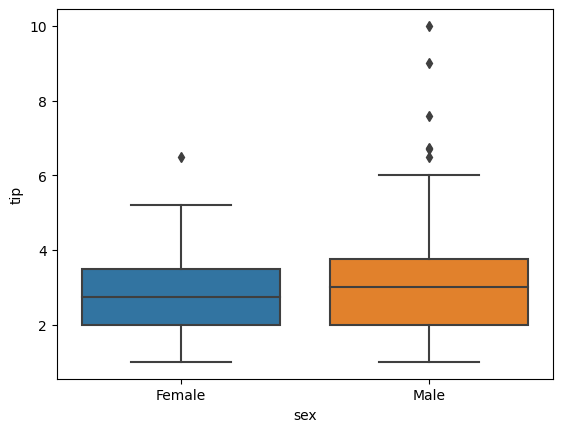

In [641]:
# sns.boxplot(df["tip"])
sns.boxplot(x= df["sex"],y = df["tip"])


<Axes: xlabel='total_bill', ylabel='Density'>

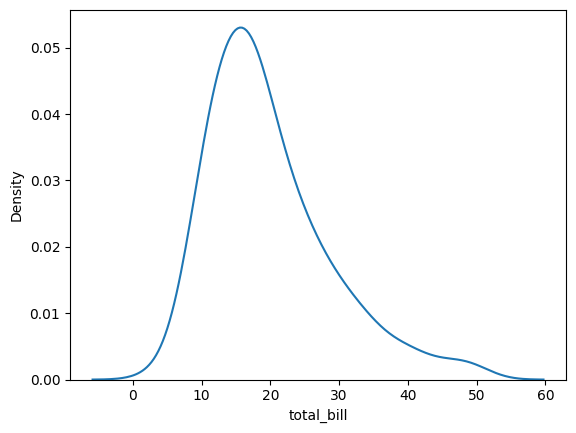

In [649]:
# sns.boxplot(x= df["smoker"],y = df["tip"])
sns.kdeplot(df["total_bill"])

<Axes: xlabel='total_bill', ylabel='tip'>

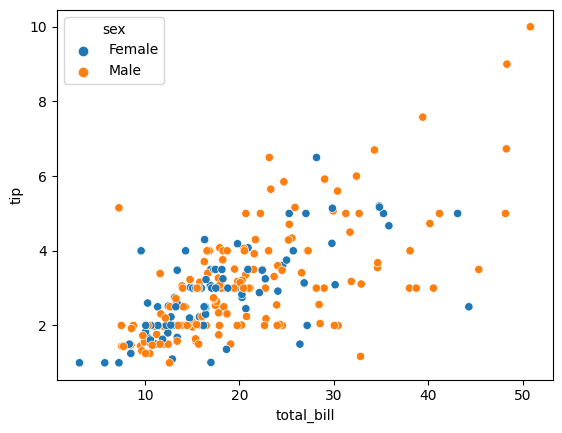

In [650]:
sns.scatterplot(x= df["total_bill"],y = df["tip"],hue= df["sex"])

<Axes: xlabel='total_bill', ylabel='tip'>

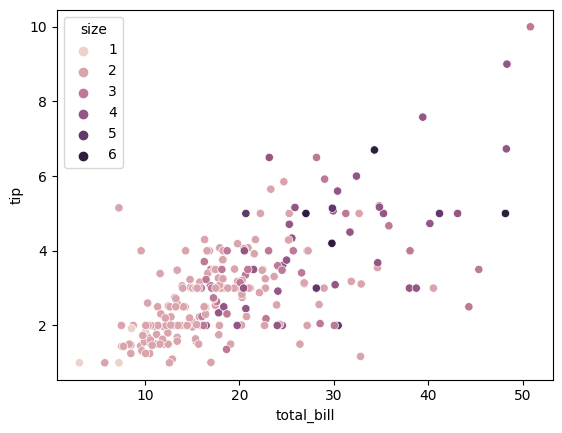

In [651]:
sns.scatterplot(x= df["total_bill"],y = df["tip"],hue= df["size"])

<Axes: xlabel='time', ylabel='tip'>

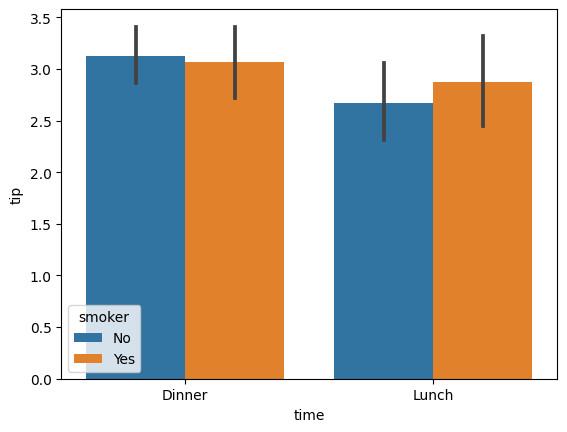

In [66]:
df.sample(5)
df["day"].value_counts()
df.sample(5)
sns.barplot(x = df["time"],y = df["tip"],hue=df["smoker"])

In [765]:
df.loc[172,"tip"] = 2.15
df[172:173]

,total_bill,tip,sex,smoker,day,time,size
172,7.25,2.15,Male,Yes,Sun,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

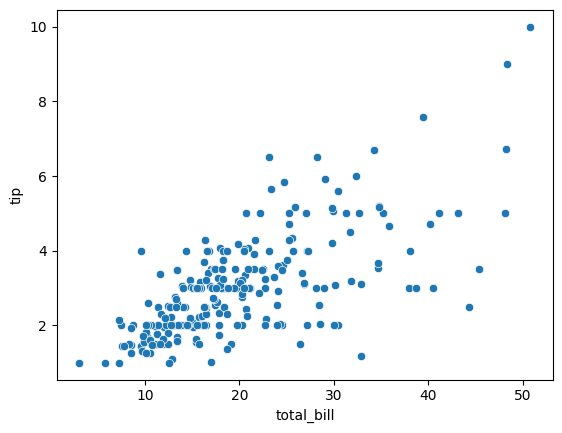

In [653]:
sns.scatterplot(x=df["total_bill"],y=df["tip"])

In [766]:
Q1 = df["total_bill"].quantile(0.25)
Q3 = df["total_bill"].quantile(0.75)

IQR = Q3 - Q1
IQR

U = Q3 + 2.0*IQR
L = Q1 - 1.5*IQR
U

45.76499999999999

In [767]:
df[(df["total_bill"] > U) | (df["total_bill"] < L)]  # Detect Outliers

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [768]:
Q1 = df["tip"].quantile(0.25)
Q3 = df["tip"].quantile(0.75)

IQR = Q3 - Q1
IQR

U = Q3 + 2.0*IQR
L = Q1 - 1.5*IQR
U

6.59

In [769]:
df1 = df[(df["tip"] < U) & (df["tip"] > L)] 
df1.reset_index(drop=True,inplace=True)

In [770]:
df1["size"].replace({6:5,1:2},inplace=True)

In [771]:
df1.groupby(df1["size"]).get_group(5)
df1.skew(numeric_only=True)
df1["size"].value_counts()

size
2    159
3     37
4     34
5      8
Name: count, dtype: int64

In [772]:
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
233,29.03,5.92,Male,No,Sat,Dinner,3
234,27.18,2.00,Female,Yes,Sat,Dinner,2
235,22.67,2.00,Male,Yes,Sat,Dinner,2
236,17.82,1.75,Male,No,Sat,Dinner,2


In [773]:
df1["sex"].value_counts()

sex
Male      152
Female     86
Name: count, dtype: int64

### Feature Engg

#### Encoding

In [774]:
# df.skew(numeric_only=True)
df1["sex"].replace({"Male":1,"Female":0},inplace=True)
df1["smoker"].replace({"Yes":1,"No":0},inplace=True)
df1["time"].replace({"Dinner":1,"Lunch":0},inplace=True)
df1.shape

(238, 7)

#### OHE

In [776]:
df1 = pd.get_dummies(df1,columns=["day"],dtype=int)
df1.sample(5)

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
66,20.23,2.01,1,0,1,2,0,1,0,0
27,21.70,4.30,1,0,1,2,0,1,0,0
31,15.06,3.00,0,0,1,2,0,1,0,0
41,13.94,3.06,1,0,1,2,0,0,1,0
230,12.60,1.00,1,1,1,2,0,1,0,0


In [904]:
df1["tip"] = df1["tip"] * 30
df1["total_bill"] = df1["total_bill"] * 90

In [905]:
df1

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,1529.1,30.3,0,0,1,2,0,0,1,0
1,930.6,49.8,1,0,1,3,0,0,1,0
2,1890.9,105.0,1,0,1,3,0,0,1,0
3,2131.2,99.3,1,0,1,2,0,0,1,0
4,2213.1,108.3,0,0,1,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
233,2612.7,177.6,1,0,1,3,0,1,0,0
234,2446.2,60.0,0,1,1,2,0,1,0,0
235,2040.3,60.0,1,1,1,2,0,1,0,0
236,1603.8,52.5,1,0,1,2,0,1,0,0


#### Correlation

<Axes: >

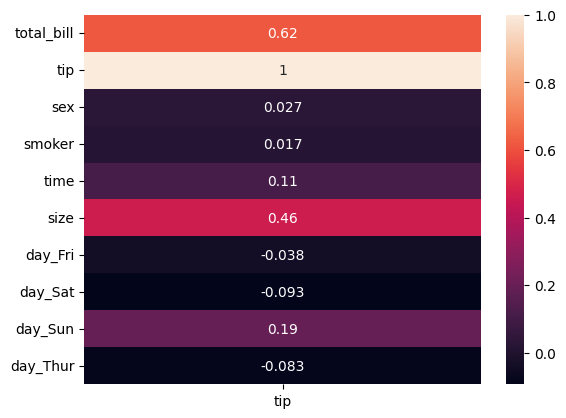

In [906]:
df1.corr()["tip"]
sns.heatmap(df1.corr()[["tip"]],annot=True)

#### Linearity

In [907]:
x = df1.drop("tip",axis=1)
x.sample(2)

,total_bill,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
229,906.3,1,0,1,2,0,1,0,0
10,924.3,1,0,1,2,0,0,1,0


In [908]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []

for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x,i))
    
pd.DataFrame({"VIF_Value":vif},index=x.columns)
# x.columns

,VIF_Value
total_bill,1.619772
sex,1.062590
smoker,1.197682
time,9.052196
size,1.595598
day_Fri,3.382202
day_Sat,21.080201
day_Sun,19.991956
day_Thur,3.522942


In [909]:
df1

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,1529.1,30.3,0,0,1,2,0,0,1,0
1,930.6,49.8,1,0,1,3,0,0,1,0
2,1890.9,105.0,1,0,1,3,0,0,1,0
3,2131.2,99.3,1,0,1,2,0,0,1,0
4,2213.1,108.3,0,0,1,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
233,2612.7,177.6,1,0,1,3,0,1,0,0
234,2446.2,60.0,0,1,1,2,0,1,0,0
235,2040.3,60.0,1,1,1,2,0,1,0,0
236,1603.8,52.5,1,0,1,2,0,1,0,0


### Model Training

In [910]:
x = df1.drop("tip",axis=1)
y = df1["tip"]

In [911]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [912]:
x_train.shape
y_train.shape
# x_test.shape
y_test.shape

(48,)

In [913]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [887]:
lr.intercept_    # offset
# lr.coef_         # Wightage

1.076704367793637

### Model Evalution

In [914]:
# LR
y_pred = lr.predict(x_test)

mae = mean_absolute_error(y_pred,y_test)
print("MAE : ",mae)

mse = mean_squared_error(y_pred,y_test)
print("MSE : ",mse)

r2 = r2_score(y_pred,y_test)
r2

MAE :  18.753831312505124
MSE :  643.2292952897388


-0.04975622985083117

In [915]:
lr.predict(x_test[10:18])

array([94.37882387, 75.18258414, 55.79471335, 61.94157325, 70.49228486,
       77.90445161, 85.97605533, 84.96786241])

In [916]:
y_test[10:18]

2      105.0
125     60.0
109     30.0
57      52.8
209     33.0
77      81.3
113    105.0
24      70.2
Name: tip, dtype: float64

In [808]:
# Knn
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)


y_pred = knn.predict(x_test)

mae = mean_absolute_error(y_pred,y_test)
print("MAE : ",mae)

mse = mean_squared_error(y_pred,y_test)
print("MSE : ",mse)

r2 = r2_score(y_pred,y_test)
print("R2 Score : ",r2)

# KNN training

y_pred_train = knn.predict(x_train)

mae = mean_absolute_error(y_pred_train,y_train)
print("MAE : ",mae)

mse = mean_squared_error(y_pred_train,y_train)
print("MSE : ",mse)

rmse = np.sqrt(mse)

r2 = r2_score(y_pred_train,y_train)
print("R2 Score : ",r2)

MAE :  0.6743333333333333
MSE :  0.782171
R2 Score :  0.018784870689478428
MAE :  0.664
MSE :  0.7812320842105264
R2 Score :  -0.11924575083571964


In [810]:
# DT

dt = DecisionTreeRegressor(max_features=3,min_samples_leaf=2,ccp_alpha=0.012,random_state=2,)
dt.fit(x_train,y_train)
dt
y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_pred,y_test)
print("MAE : ",mae)

mse = mean_squared_error(y_pred,y_test)
print("MSE : ",mse)

r2 = r2_score(y_pred,y_test)
print("R2 Score : ",r2)

# DT training

y_pred_train = dt.predict(x_train)

mae = mean_absolute_error(y_pred_train,y_train)
print("MAE : ",mae)

mse = mean_squared_error(y_pred_train,y_train)
print("MSE : ",mse)

rmse = np.sqrt(mse)

r2 = r2_score(y_pred_train,y_train)
print("R2 Score : ",r2)

MAE :  0.6090099988824915
MSE :  0.7268453245661769
R2 Score :  -0.49309010007511556
MAE :  0.6548161736246821
MSE :  0.731008260907337
R2 Score :  -0.10217736864961369


In [382]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [839]:
# Random Forest

rf = RandomForestRegressor(max_features=0.8,max_samples=0.90,n_estimators=50,random_state=5)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

mae = mean_absolute_error(y_pred,y_test)
print("MAE : ",mae)

mse = mean_squared_error(y_pred,y_test)
print("MSE : ",mse)

r2 = r2_score(y_pred,y_test)
print("R2 Score : ",r2)

# DT training

y_pred_train = rf.predict(x_train)

mae = mean_absolute_error(y_pred_train,y_train)
print("MAE : ",mae)

mse = mean_squared_error(y_pred_train,y_train)
print("MSE : ",mse)

rmse = np.sqrt(mse)

r2 = r2_score(y_pred_train,y_train)
print("R2 Score : ",r2)

MAE :  0.4540208333333336
MSE :  0.3777256291666671
R2 Score :  0.572679059076903
MAE :  0.3137736842105264
MSE :  0.174871532
R2 Score :  0.804213162214563


In [812]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [813]:
hyp_par = {"max_features":[0.25,0.4,0.5,0.6,0.75,0.9],
           "max_samples":[0.5,0.6,0.9,0.7],
           "n_estimators":np.arange(10,90)
          }

In [814]:
rscv_rf = RandomizedSearchCV(rf,hyp_par,scoring="r2")

In [815]:
rscv_rf.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(max_features=0.6,
                                                   max_samples=0.75,
                                                   n_estimators=55,
                                                   random_state=5),
                   param_distributions={'max_features': [0.25, 0.4, 0.5, 0.6,
                                                         0.75, 0.9],
                                        'max_samples': [0.5, 0.6, 0.9, 0.7],
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])},
                   scoring='r2')

In [816]:
rscv_rf.best_params_

{'n_estimators': 54, 'max_samples': 0.6, 'max_features': 0.75}

In [840]:
x_test[5:10]

,total_bill,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
114,29.93,1,0,1,4,0,0,1,0
157,21.50,1,0,1,4,0,0,1,0
11,35.26,0,0,1,4,0,0,1,0
219,16.27,0,1,0,2,1,0,0,0
46,32.40,1,0,1,4,0,0,1,0


In [934]:
lr.predict([[200,1,1,1,10,0,1,0,0]])

array([65.51031644])

In [935]:
y_test[5:10]

114    152.1
157    105.0
11     150.0
219     75.0
46     180.0
Name: tip, dtype: float64

In [583]:
df["sex"].replace({"Male":1,"Female":0},inplace=True)
df["smoker"].replace({"Yes":1,"No":0},inplace=True)
df["time"].replace({"Dinner":1,"Lunch":0}

SyntaxError: incomplete input (688235415.py, line 3)

In [584]:
d = {"gender":{"Male":1,"Female":0},"smoker":{"Yes":1,"No":0},"time":{"Dinner":1,"Lunch":0},"col":x.columns.tolist()}
d

{'gender': {'Male': 1, 'Female': 0},
 'smoker': {'Yes': 1, 'No': 0},
 'time': {'Dinner': 1, 'Lunch': 0},
 'col': ['total_bill',
  'sex',
  'smoker',
  'time',
  'size',
  'day_Fri',
  'day_Sat',
  'day_Sun',
  'day_Thur']}

In [468]:
import json
import pickle

In [844]:
with open("proj_data.json","w") as f:
    json.dump(d,f)

In [936]:
with open("model.pkl","wb") as f:
    pickle.dump(lr,f)

In [471]:
d

{'gender': {'Male': 1, 'Female': 0},
 'smoker': {'Yes': 1, 'No': 0},
 'time': {'Dinner': 1, 'Lunch': 0},
 'col': ['total_bill',
  'sex',
  'smoker',
  'time',
  'size',
  'day_Fri',
  'day_Sat',
  'day_Sun',
  'day_Thur']}

In [961]:

import pickle
import json
import numpy as np
import warnings
warnings.filterwarnings("ignore")

class Tips_Pred():
    
    def __init__(self,total_bill,gender,smoker,time,size,day):
        self.total_bill = total_bill
        self.gender = gender
        self.smoker = smoker
        self.time = time
        self.size = size
        self.day = "day_" + day
        
    def load_data(self):
        with open("Model.pkl","rb") as k:
            self.model = pickle.load(k)
        
        with open("proj_data.json","r") as l:
            self.json_data = json.load(l)

        
    def pred_tips(self):
        self.load_data()
             
        day_index = self.json_data["col"].index(self.day)
        
        test_array = np.zeros([1,len(self.json_data["col"])],dtype=int)
        
        test_array[0][0] = self.total_bill
        test_array[0][1] = self.json_data["gender"][self.gender]
        test_array[0][2] = self.json_data["smoker"][self.smoker]
        test_array[0][3] = self.json_data["time"][self.time]
        test_array[0][4] = self.size
        test_array[0,day_index] = 1
        print("Test Array -",test_array)
        
        pred_tip = (np.floor(self.model.predict(test_array))-15)[0]
        print(f"If this Costomer give Tip then Predicted tip is  {pred_tip} Rs ")    
        return pred_tip

    
obj = Tips_Pred(400000,"Female","Yes","Dinner",6,"Sun")
obj.pred_tips()

Test Array - [[400000      0      1      1      6      0      0      1      0]]
If this Costomer give Tip then Predicted tip is  11349.0 Rs 


11349.0